<a href="https://colab.research.google.com/github/pranjul6386/covid19/blob/master/research_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/My Drive/kaggle_notebooks/RMFD.zip"

Streaming output truncated to the last 5000 lines.
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0009.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0010.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0011.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0012.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0013.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0014.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0015.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0016.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_

In [2]:
import os
import numpy as np
import cv2
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [3]:
img = cv2.imread('/content/images/nomask/benxi/0_0_benxi_0013.jpg', cv2.IMREAD_UNCHANGED)
 
# get dimensions of image
dimensions = img.shape

 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (127, 125, 3)
Image Height       :  127
Image Width        :  125
Number of Channels :  3


In [4]:
list_images=[]
labels=[]

In [7]:
for filename in os.listdir("/content/images/mask"):
  for img in os.listdir("/content/images/mask" + "/" + filename):
    path= str("/content/images/mask" + "/"+ filename + "/" + img)
    try:

      image=cv2.imread(path)
    except:
      print("file not found error")

      continue
    image=cv2.resize(image,(128,128))
    arr=np.array(image)
    list_images.append(arr)
    labels.append("masked")


In [8]:

len(list_images)

4652

In [ ]:
labels

In [5]:
for filename in os.listdir("/content/images/nomask"):
  for img in os.listdir("/content/images/nomask" + "/" + filename):
    path= str("/content/images/nomask" + "/"+ filename + "/" + img)
    try:

      image=cv2.imread(path)
    except:
      print("file not found error")

      continue
    image=cv2.resize(image,(128,128))
    arr=np.array(image)
    list_images.append(arr)
    labels.append("unmasked")
    if len(list_images)>2000:
      break

In [6]:
len(list_images)

2449

In [10]:
y_train=np.array(labels)
labelencoder=LabelEncoder()
y_train=labelencoder.fit_transform(y_train)

In [11]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(5,5),input_shape=(128,128,3),activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0

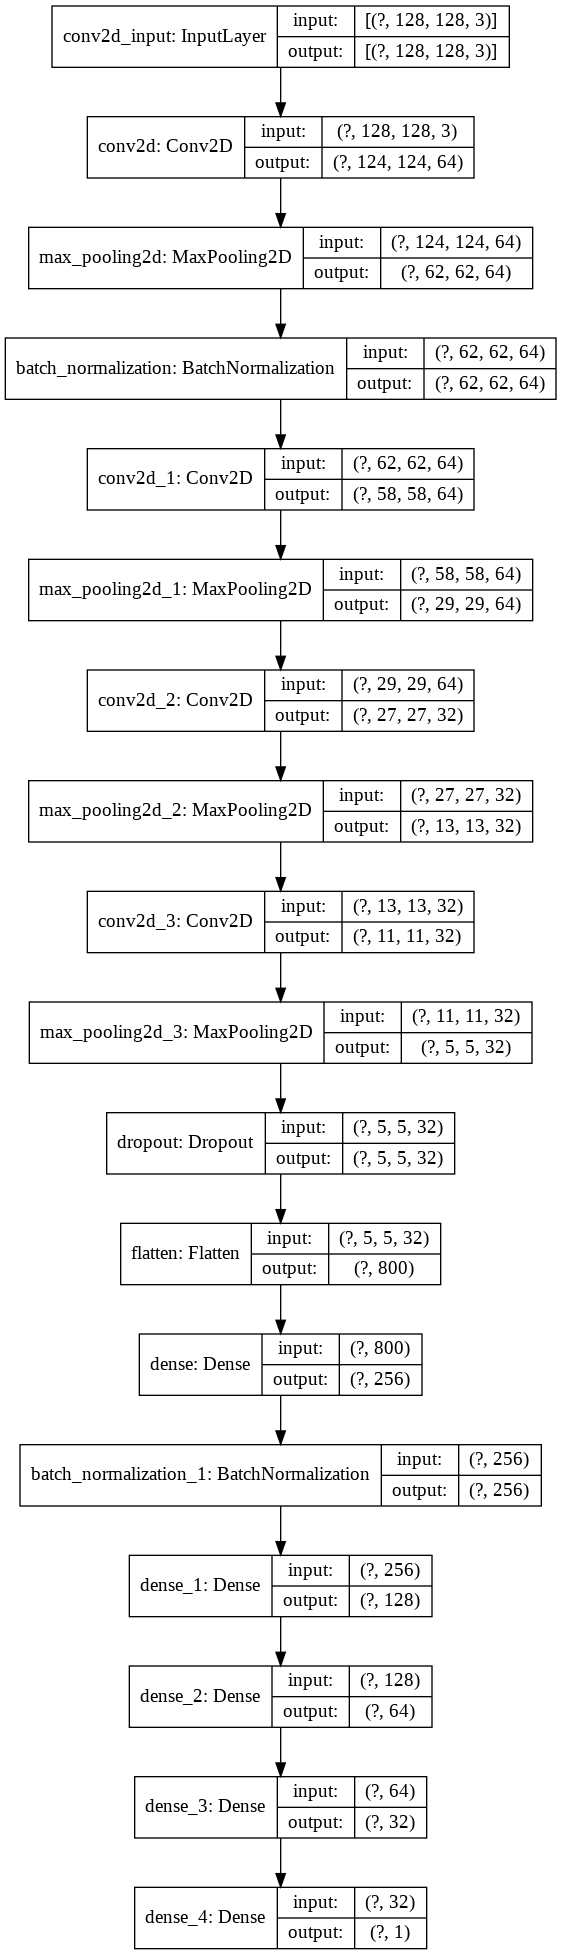

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
x_data=np.array(list_images)
print(x_data.shape)

(4652, 128, 128, 3)


In [16]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_data,y_train, test_size=0.20, shuffle= True)

In [23]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=64, epochs=100, verbose=0)

In [24]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [25]:
print(train_acc)
print(test_acc)

1.0
0.989258885383606


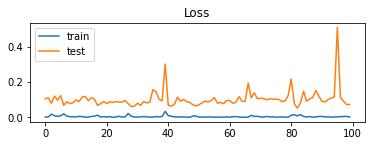

In [31]:
# plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


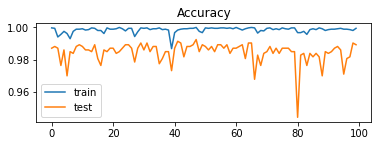

In [30]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [35]:
# accuracy: (tp + tn) / (p + n)
yhat_classes = model.predict_classes(x_test, verbose=0)
yhat_probs = model.predict(x_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
accuracy = accuracy_score(y_test,yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.989259
Precision: 0.985537
Recall: 0.993750
F1 score: 0.989627
Cohens kappa: 0.978491
ROC AUC: 0.997760
[[444   7]
 [  3 477]]
